In [1]:
from IPython.display import FileLink

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(dplyr)
library(ggplot2)
library(phyloseq)
library(RColorBrewer)
library(gridExtra)
library(stats)


Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid


###These files are from the density shift notebooks [1](./Density_shift_100.ipynb), [2](./Density_shift_700.ipynb), [3](./Density_shift_CC.ipynb).

In [4]:
%%R
df.shifts.CC = read.csv("data/density_shifts_CC.csv", sep = ",", header = TRUE, )
df.shifts.CC$shift = as.numeric(as.character(df.shifts.CC$shift))
head(df.shifts.CC)

       OTU        shift Day Treatment
1 OTU.4676  0.024507476  28    13C000
2  OTU.759 -0.018044877  28    13C000
3 OTU.9994           NA  28    13C000
4  OTU.758 -0.006204949  28    13C000
5 OTU.9015           NA  28    13C000
6 OTU.9996           NA  28    13C000


In [5]:
%%R
df.shifts.C100 = read.csv("data/density_shifts_C100.csv", sep = ",", header = TRUE, )
df.shifts.C100$shift = as.numeric(as.character(df.shifts.C100$shift))
head(df.shifts.C100)

       OTU        shift Day Treatment
1 OTU.4676  0.014023631  28    13C100
2  OTU.759 -0.001393483  28    13C100
3 OTU.9994           NA  28    13C100
4  OTU.758 -0.015521089  28    13C100
5 OTU.9015           NA  28    13C100
6 OTU.9996           NA  28    13C100


In [6]:
%%R
df.shifts.C700 = read.csv("data/density_shifts_C700.csv", sep = ",", header = TRUE, )
df.shifts.C700$shift = as.numeric(as.character(df.shifts.C700$shift))
head(df.shifts.C700)

       OTU       shift Day Treatment
1 OTU.4676  0.01981864  28    13C700
2  OTU.759 -0.00866067  28    13C700
3 OTU.9994          NA  28    13C700
4  OTU.758 -0.01440077  28    13C700
5 OTU.9015          NA  28    13C700
6 OTU.9996          NA  28    13C700


In [7]:
%%R
density_shift_all = rbind(df.shifts.CC, df.shifts.C100, df.shifts.C700)
head(density_shift_all)

       OTU        shift Day Treatment
1 OTU.4676  0.024507476  28    13C000
2  OTU.759 -0.018044877  28    13C000
3 OTU.9994           NA  28    13C000
4  OTU.758 -0.006204949  28    13C000
5 OTU.9015           NA  28    13C000
6 OTU.9996           NA  28    13C000


In [8]:
%%R
write.csv(density_shift_all, "data/density_shifts_all.csv")

In [9]:
!head data/density_shifts_all.csv

"","OTU","shift","Day","Treatment"
"1","OTU.4676",0.0245074760226234,28,"13C000"
"2","OTU.759",-0.0180448773590349,28,"13C000"
"3","OTU.9994",NA,28,"13C000"
"4","OTU.758",-0.00620494887500089,28,"13C000"
"5","OTU.9015",NA,28,"13C000"
"6","OTU.9996",NA,28,"13C000"
"7","OTU.5680",NA,28,"13C000"
"8","OTU.9017",-0.00596657183326155,28,"13C000"
"9","OTU.9444",NA,28,"13C000"


###This file is from the [sparsity notebook](./Sparsity_make_l2fc_table.ipynb).

In [10]:
%%R
df_all = read.table("/var/seq_data/priming_exp/data/l2fc_table.csv", 
                    header = TRUE,
                    sep = ",")
head(df_all)

  sparsity_threshold Day Treatment       OTU log2FoldChange         p    Rank1
1               0.25  14    13C000  OTU.4204    -0.20553170 1.0000000 Bacteria
2               0.25  14    13C000   OTU.467    -0.33054855 1.0000000 Bacteria
3               0.25  14    13C000   OTU.905     0.01698885 0.9827594 Bacteria
4               0.25  14    13C000  OTU.7253     0.02799601 0.9772968 Bacteria
5               0.25  14    13C000    OTU.67    -0.60115954 1.0000000 Bacteria
6               0.25  14    13C000 OTU.10580     0.36193427 0.7248674 Bacteria
          Rank2 Rank3                Rank4 Rank5 Rank6 Rank7 Rank8 padj
1 Acidobacteria DA023                 <NA>  <NA>  <NA>  <NA>  <NA>    1
2 Acidobacteria DA023 uncultured_bacterium  <NA>  <NA>  <NA>  <NA>    1
3 Acidobacteria DA023 uncultured_bacterium  <NA>  <NA>  <NA>  <NA>    1
4 Acidobacteria DA023 uncultured_bacterium  <NA>  <NA>  <NA>  <NA>    1
5 Acidobacteria DA023 uncultured_bacterium  <NA>  <NA>  <NA>  <NA>    1
6 Acidobacteria

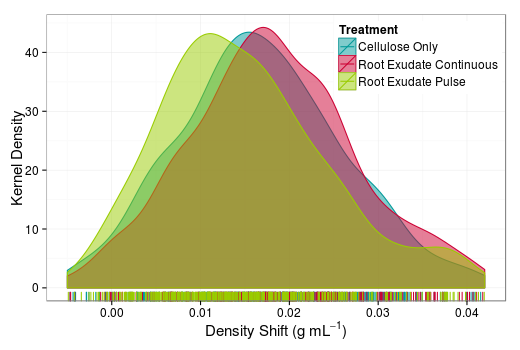

In [11]:
%%R -w 520 -h 350

FDR = 0.1

df_all.wShifts = merge(df_all, density_shift_all, by = c("OTU","Day","Treatment"))

df.plot = subset(df_all.wShifts, padj <= FDR)

colours = c("#009999", "#CC0033", "#99CC00")

p = ggplot(df.plot, aes(x = as.numeric(as.character(shift))))

p = p + geom_density(aes(color = Treatment, fill = Treatment), alpha = 0.50)
p = p + geom_rug(aes(color = Treatment))
p = p + scale_color_manual(values=colours,
                           breaks=c("13C000", "13C100", "13C700"),
                           labels=c("Cellulose Only", "Root Exudate Continuous", "Root Exudate Pulse")) 

p = p + scale_fill_manual(values=colours,
                          breaks=c("13C000", "13C100", "13C700"),
                          labels=c("Cellulose Only", "Root Exudate Continuous", "Root Exudate Pulse"))
p = p + labs(y = "Kernel Density", x =  expression(paste("Density Shift (g mL",{}^-1,")",sep="")))
p = p + xlim(xmin = -0.005, xmax = 0.042)

p = p + theme_bw()
p = p + theme(axis.title.y = element_text(size=15))
p = p + theme(axis.title.x = element_text(size=15))
p = p + theme(axis.text.x = element_text(size=12))
p = p + theme(axis.text.y = element_text(size=12))
p = p + theme(legend.title = element_text(size = 12), legend.text = element_text(size = 12))
p = p + theme(legend.position=c(0.81,0.85))

p

In [12]:
%%R -w 520 -h 350
pdf("figs/density_shifts_KDE.pdf", width = 7, height = 5)
grid.arrange(p, ncol = 1)
dev.off()

png 
  2 


In [13]:
FileLink("figs/density_shifts_KDE.pdf")

/home/ashley/priming_exp/figs/density_shifts_KDE.pdf

In [14]:
%%R 
png("figs/density_shifts_KDE.png", width = 7, height = 5, units = "in", res = 600)
grid.arrange(p, ncol = 1)
dev.off()

png 
  2 


In [15]:
FileLink("figs/density_shifts_KDE.png")

/home/ashley/priming_exp/figs/density_shifts_KDE.png

In [16]:
%%R
FDR = 0.1
CO.shifts = subset(df_all.wShifts, (Treatment == "13C000")&(padj <= FDR))$shift
REcont.shifts = subset(df_all.wShifts, (Treatment == "13C100")&(padj <= FDR))$shift
REpulse.shifts = subset(df_all.wShifts, (Treatment == "13C700")&(padj <= FDR))$shift

In [17]:
%%R
FDR = 0.10

median = df_all.wShifts %>%
    filter(padj <=FDR) %>%
    group_by(Treatment) %>%
    summarize(median(shift, na.rm = TRUE))

median

Source: local data frame [3 x 2]

  Treatment median(shift, na.rm = TRUE)
1    13C000                  0.01601594
2    13C100                  0.01806222
3    13C700                  0.01326730


In [18]:
%%R
wilcox.test(REcont.shifts, CO.shifts)#, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  REcont.shifts and CO.shifts
W = 116253, p-value = 0.0006523
alternative hypothesis: true location shift is not equal to 0



In [19]:
%%R
wilcox.test(CO.shifts, REpulse.shifts)#, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  CO.shifts and REpulse.shifts
W = 147134, p-value = 0.0002233
alternative hypothesis: true location shift is not equal to 0



In [20]:
%%R
wilcox.test(REcont.shifts, REpulse.shifts)#, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  REcont.shifts and REpulse.shifts
W = 129054, p-value = 2.008e-11
alternative hypothesis: true location shift is not equal to 0



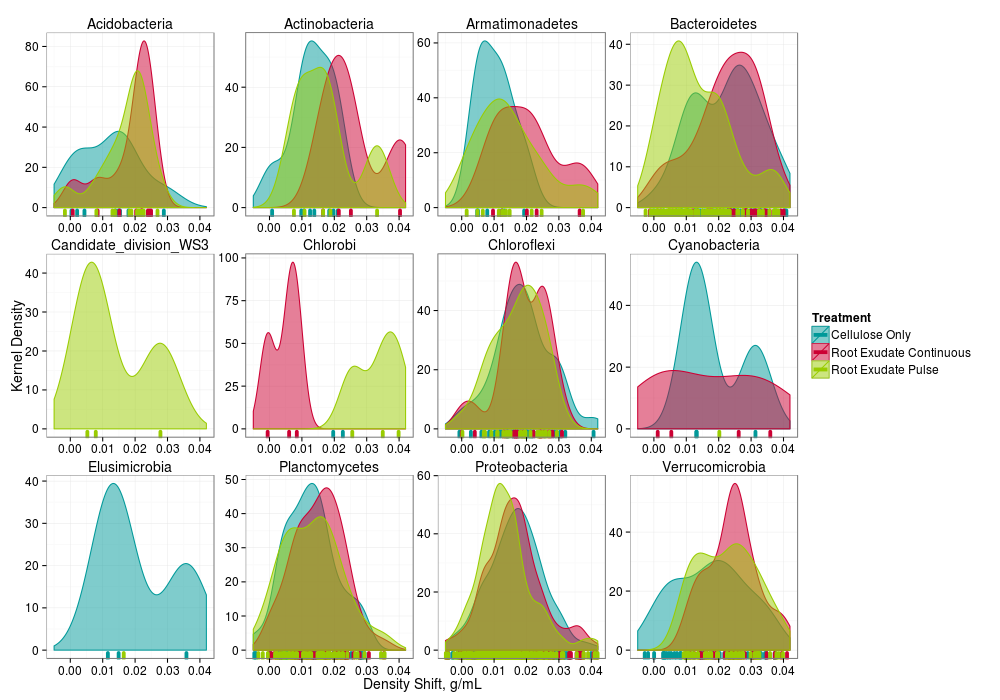

In [58]:
%%R -w 1000 -h 700
df_all.wShifts = merge(df_all, density_shift_all, by = c("OTU","Day","Treatment"))

df.plot = subset(df_all.wShifts, padj <= FDR)
df.plot2 = subset(df.plot, Rank2 %in% c("Acidobacteria", "Actinobacteria", "Armatimonadetes", "Bacteroidetes",
                                       "Chlorobi", "Chloroflexi", "Cyanobacteria", "Candidate_division_WS3", 
                                       "Elusimicrobia", "Planctomycetes", "Proteobacteria", "Verrucomicrobia"))

colours = c("#009999", "#CC0033", "#99CC00")

p2 = ggplot(df.plot2, aes(x = as.numeric(as.character(shift))))

p2 = p2 + facet_wrap(~Rank2, ncol=4, scales = "free")
p2 = p2 + geom_density(aes(color = Treatment, fill = Treatment), alpha = 0.50)
p2 = p2 + geom_rug(aes(color = Treatment), size = 1.8)
p2 = p2 + scale_color_manual(values=colours,
                             breaks=c("13C000", "13C100", "13C700"),
                             labels=c("Cellulose Only", "Root Exudate Continuous", "Root Exudate Pulse")) 

p2 = p2 + scale_fill_manual(values=colours, 
                           breaks=c("13C000", "13C100", "13C700"),
                             labels=c("Cellulose Only", "Root Exudate Continuous", "Root Exudate Pulse"))
p2 = p2 + labs(y = "Kernel Density", x = "Density Shift, g/mL")
p2 = p2 + xlim(xmin = -0.005, xmax = 0.042)
p2 = p2 + theme_bw()
p2 = p2 + theme(strip.text = element_text(size=14),
                strip.background = element_blank(),
                legend.text = element_text(size = 12),
                legend.title = element_text(size = 12),
                axis.title.x = element_text(size = 14),
                axis.title.y = element_text(size = 14),
                axis.text.x = element_text(size = 12),
                axis.text.y = element_text(size = 12))

p2

In [62]:
%%R
pdf("figs/shift_byphylum.pdf", w = 15, h = 7)
print(grid.arrange(p2, ncol =1))
dev.off()

NULL
png 
  2 


In [63]:
FileLink("figs/shift_byphylum.pdf")

/home/ashley/priming_exp/figs/shift_byphylum.pdf

In [64]:
%%R
png("figs/shift_byphylum.png", w = 15, h = 7, units = "in", res = 600)
print(grid.arrange(p2, ncol = 1))
dev.off()

NULL
png 
  2 


In [65]:
FileLink("figs/shift_byphylum.png")

/home/ashley/priming_exp/figs/shift_byphylum.png

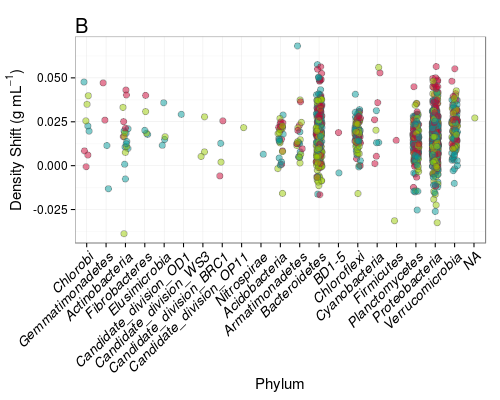

In [21]:
%%R -w 500 -h 400
df_all.wShifts = merge(df_all, density_shift_all, by = c("OTU","Day","Treatment"))

df.plot = subset(df_all.wShifts, padj <= FDR)

d = df.plot %>%
    group_by(Rank2) %>%
    summarize(max.shift = max(shift)) %>%
    arrange(desc(max.shift))

order = d$Rank2

df.plot$Rank2 = factor(df.plot$Rank2, levels = order)

colours = c("#009999", "#CC0033", "#99CC00")

p3 = ggplot(df.plot, aes(x = Rank2, y = shift, fill = Treatment))

p3 = p3 + geom_point(shape = 21, size = 3, alpha = 0.5, position = position_jitter(w = 0.15), color = "gray33")

p3 = p3 + theme_bw()

p3 = p3 + theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1, face = "italic"))

p3 = p3 + labs(y = expression(paste("Density Shift (g mL",{}^-1,")",sep="")), x = "Phylum")

p3 = p3 + theme(axis.title.y = element_text(size = 15, vjust = 1.25))

p3 = p3 + theme(axis.title.x = element_text(size = 15))

p3 = p3 + scale_fill_manual(values=colours,
                            breaks=c("13C000", "13C100", "13C700"),
                            labels=c("Cellulose Only", "Root Exudate Continuous", "Root Exudate Pulse")) 
#p3 = p3 + theme(legend.text = element_text(size = 11))

#p3 = p3 + theme(legend.title = element_text(size = 11))

p3 = p3 + ggtitle("B")
p3 = p3 + theme(plot.title = element_text(hjust = 0, size = 20))
p3 = p3 + theme(legend.position = "none")
#p3 = p3 + theme(axis.title.y = element_text(size=15))
#p3 = p3 + theme(axis.title.x = element_text(size=15))
#p3 = p3 + theme(axis.text.x = element_text(size=12))
p3 = p3 + theme(axis.text.y = element_text(size=12))
#p3 = p3 + theme(legend.title = element_text(size = 13), legend.text = element_text(size = 13))
#p3 = p3 + theme(legend.position=c(0.2,0.8))

p3

In [22]:
%%R
ggsave("figs/BDshift_scatter_phylum.png", p3, h = 4, w = 6)

In [23]:
FileLink("figs/BDshift_scatter_phylum.png")

/home/ashley/priming_exp/figs/BDshift_scatter_phylum.png

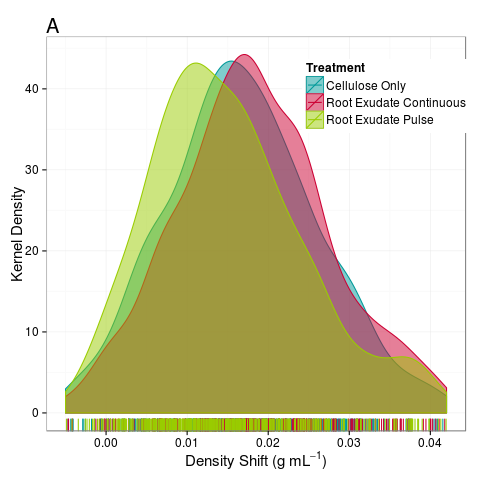

In [24]:
%%R
p = p + ggtitle("A")
p = p + theme(plot.title = element_text(hjust = 0, size = 20))
p

NULL


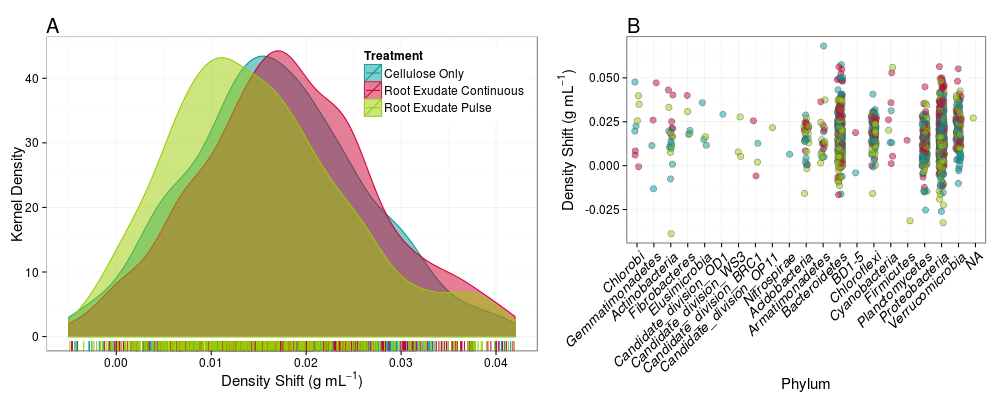

In [34]:
%%R -w 1000 -h 400

density.shifts = grid.arrange(p, p3, widths = c(1.6, 1.3),heights = c(1, 1.5), ncol = 2)

density.shifts

In [39]:
%%R
pdf("figs/shift_all_andby_phylum.pdf", w = 15, h = 6)
print(grid.arrange(p, p3, widths = c(1.6, 1.3),heights = c(1, 1.5), ncol = 2))
dev.off()

NULL
png 
  2 


In [40]:
FileLink("figs/shift_all_andby_phylum.pdf")

/home/ashley/priming_exp/figs/shift_all_andby_phylum.pdf

In [41]:
%%R
png("figs/shift_all_andby_phylum.png", w = 15, h = 6, units = "in", res = 600)
print(grid.arrange(p, p3, widths = c(1.6, 1.3),heights = c(1, 1.5), ncol = 2))
dev.off()

NULL
png 
  2 


In [42]:
FileLink("figs/shift_all_andby_phylum.png")

/home/ashley/priming_exp/figs/shift_all_andby_phylum.png